In [1]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
def test_data_prep(*files):
    test_data = [pd.DataFrame(loadarff(file)[0]) for file in files]
    for i in range(len(test_data)):
        test_data[i]['class'].replace([b'0', b'1'], [0, 1], inplace = True)
    return test_data

In [3]:

test_df = test_data_prep('data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff')
test_df

[         Attr1     Attr2     Attr3      Attr4     Attr5     Attr6     Attr7  \
 0     0.200550  0.379510  0.396410    2.04720   32.3510  0.388250  0.249760   
 1     0.209120  0.499880  0.472250    1.94470   14.7860  0.000000  0.258340   
 2     0.248660  0.695920  0.267130    1.55480   -1.1523  0.000000  0.309060   
 3     0.081483  0.307340  0.458790    2.49280   51.9520  0.149880  0.092704   
 4     0.187320  0.613230  0.229600    1.40630   -7.3128  0.187320  0.187320   
 5     0.228220  0.497940  0.359690    1.75020  -47.7170  0.000000  0.281390   
 6     0.111090  0.647440  0.289710    1.47050    2.5349  0.000000  0.111090   
 7     0.532320  0.027059  0.705540   53.95400  299.5800  0.000000  0.652400   
 8     0.009020  0.632020  0.053735    1.12630  -37.8420  0.000000  0.014434   
 9     0.124080  0.838370  0.142040    1.16940  -91.8830  0.000000  0.153280   
 10    0.240010  0.443550  0.188350    1.44000  -21.1650 -0.931900  0.240010   
 11   -0.027117  0.111480  0.119890    2

In [4]:
def test_train_splitter(data):
    X_train_2 = []
    X_test_2 = []
    y_train_2 = []
    y_test_2 = []
    for i in range(len(data)):
        X, y = data[i].iloc[:,:-1], data[i]['class']
        X.drop(['Attr37', 'Attr21'], axis=1, inplace=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
        X_train.fillna(X_train.median(), inplace=True)
        X_test.fillna(X_test.median(), inplace=True)
#         Q3 = X_train.quantile(0.75)
#         Q1 = X_train.quantile(0.25)
#         IQR = Q3 - Q1
#         min = Q1 - 1.5 * IQR
#         max = Q3 + 1.5 * IQR
#         for col in X_train.columns:
#             X_train[col][X_train[col] < min[col]] = min[col]
#             X_train[col][X_train[col] > max[col]] = max[col]
        X_train_2.append(X_train)
        X_test_2.append(X_test)
        y_train_2.append(y_train)
        y_test_2.append(y_test)
    X_train_fin = pd.concat(X_train_2)
    X_test_fin = pd.concat(X_test_2)
    y_train_fin = pd.concat(y_train_2)
    y_test_fin = pd.concat(y_test_2)
    return X_train_fin, X_test_fin, y_test_fin, y_train_fin
        
X_train, X_test, y_test, y_train = test_train_splitter(test_df)

X_train2 = X_train.reset_index(drop=True)
X_test2 = X_test.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)


/home/sid/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((34722, 62), (34722,), (8683, 62), (8683,))

In [6]:
y_train.value_counts()

0    33072
1     1650
Name: class, dtype: int64

In [7]:
y_test.value_counts()

0    8242
1     441
Name: class, dtype: int64

In [8]:
def get_me_mah_model(X_train, y_train, X_test, y_test, Model):
    model = Model(random_state=9)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print "Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100)
    print "f1_score", f1_score(y_test, y_pred)
    print "precision_score", precision_score(y_test, y_pred)
    print "recall_score", recall_score(y_test, y_pred)
    print "roc_auc_score", roc_auc_score(y_test, y_pred)
    print "cm matrix", confusion_matrix(y_test, y_pred)
    scores = [n for m, n in model.predict_proba(X_test)]
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    plt.plot(fpr, tpr)
    plt.plot([(0,0), (1,1)])
    len(y_test[y_test == 1])

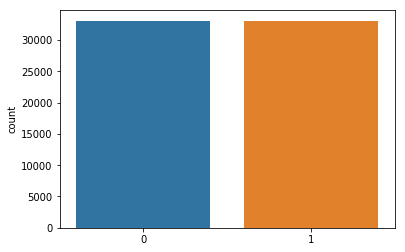

In [9]:
X_train3 = X_train2.dropna()
y_train3 = y_train2.iloc[X_train3.index]
X_test3 = X_test2.dropna()
y_test3 = y_test2.iloc[X_test3.index]
smote = SMOTE(random_state=9, kind = 'borderline2')
X_smote, y_smote = smote.fit_sample(X_train3, y_train3)
sns.countplot(y_smote)
plt.show()

In [10]:
y_train3.value_counts()

0    33072
1     1650
Name: class, dtype: int64

In [11]:
y_test3.value_counts()

0    8242
1     441
Name: class, dtype: int64

Accuracy: 73.21%
f1_score 0.167501789549
precision_score 0.0994475138122
recall_score 0.530612244898
roc_auc_score 0.63675722655
cm matrix [[6123 2119]
 [ 207  234]]


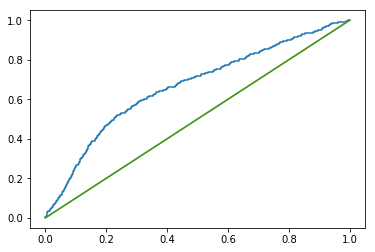

In [12]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, LogisticRegression)

In [13]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 94.23%
f1_score 0.419466975666
precision_score 0.428909952607
recall_score 0.410430839002
roc_auc_score 0.690595181695
cm matrix [[8001  241]
 [ 260  181]]


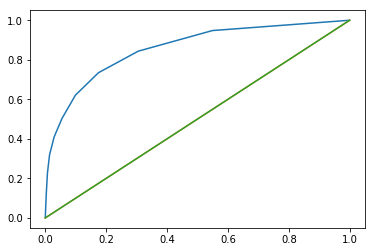

In [14]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, RandomForestClassifier)

In [15]:
# RandomForestClassifier(n_estimators=)

Accuracy: 94.78%
f1_score 0.468933177022
precision_score 0.485436893204
recall_score 0.453514739229
roc_auc_score 0.713896413536
cm matrix [[8030  212]
 [ 241  200]]


(441, 412)

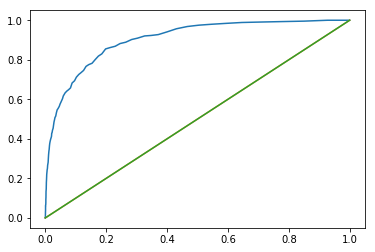

In [16]:
model = RandomForestClassifier(random_state=9, n_estimators=100, n_jobs=-1)
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test3)
print "Accuracy: %.2f%%" % (accuracy_score(y_test3, y_pred) * 100)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test3)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]),len(y_pred[y_pred == 1])

In [17]:
model.feature_importances_[np.argsort(model.feature_importances_)]

array([ 0.00675529,  0.00700639,  0.00707016,  0.00718386,  0.00721524,
        0.00777799,  0.00783384,  0.0078431 ,  0.00795915,  0.00819266,
        0.00831706,  0.00842417,  0.00846191,  0.00875156,  0.00878537,
        0.00898119,  0.00904142,  0.00910436,  0.00914562,  0.00973869,
        0.00989996,  0.00990702,  0.00999862,  0.01023173,  0.01043427,
        0.01084343,  0.01088315,  0.01098838,  0.01110324,  0.01120326,
        0.01137097,  0.0114983 ,  0.01177767,  0.01188052,  0.01238549,
        0.01337246,  0.01337408,  0.0135896 ,  0.01371098,  0.01459806,
        0.01541607,  0.01545812,  0.01602976,  0.01719673,  0.0174221 ,
        0.01915618,  0.0197357 ,  0.02034905,  0.0203982 ,  0.02185074,
        0.0232279 ,  0.02375134,  0.02478058,  0.02514106,  0.02808051,
        0.02939164,  0.03039285,  0.03212032,  0.04230297,  0.05202881,
        0.05415761,  0.05497154])

In [18]:
features_imp = pd.Series(data=model.feature_importances_, index=X_test3.columns)

In [19]:
sorted_features = features_imp.sort_values(ascending=False)
sorted_features

Attr27    0.054972
Attr41    0.054158
Attr15    0.052029
Attr6     0.042303
Attr13    0.032120
Attr39    0.030393
Attr34    0.029392
Attr24    0.028081
Attr26    0.025141
Attr42    0.024781
Attr16    0.023751
Attr46    0.023228
Attr25    0.021851
Attr58    0.020398
Attr5     0.020349
Attr38    0.019736
Attr35    0.019156
Attr23    0.017422
Attr22    0.017197
Attr29    0.016030
Attr1     0.015458
Attr51    0.015416
Attr61    0.014598
Attr59    0.013711
Attr9     0.013590
Attr55    0.013374
Attr2     0.013372
Attr12    0.012385
Attr56    0.011881
Attr60    0.011778
            ...   
Attr31    0.011203
Attr36    0.011103
Attr19    0.010988
Attr33    0.010883
Attr10    0.010843
Attr17    0.010434
Attr7     0.010232
Attr3     0.009999
Attr45    0.009907
Attr62    0.009900
Attr44    0.009739
Attr14    0.009146
Attr32    0.009104
Attr47    0.009041
Attr40    0.008981
Attr4     0.008785
Attr20    0.008752
Attr30    0.008462
Attr57    0.008424
Attr63    0.008317
Attr28    0.008193
Attr49    0.

In [20]:
sorted_features.index

Index([u'Attr27', u'Attr41', u'Attr15', u'Attr6', u'Attr13', u'Attr39',
       u'Attr34', u'Attr24', u'Attr26', u'Attr42', u'Attr16', u'Attr46',
       u'Attr25', u'Attr58', u'Attr5', u'Attr38', u'Attr35', u'Attr23',
       u'Attr22', u'Attr29', u'Attr1', u'Attr51', u'Attr61', u'Attr59',
       u'Attr9', u'Attr55', u'Attr2', u'Attr12', u'Attr56', u'Attr60',
       u'Attr64', u'Attr8', u'Attr31', u'Attr36', u'Attr19', u'Attr33',
       u'Attr10', u'Attr17', u'Attr7', u'Attr3', u'Attr45', u'Attr62',
       u'Attr44', u'Attr14', u'Attr32', u'Attr47', u'Attr40', u'Attr4',
       u'Attr20', u'Attr30', u'Attr57', u'Attr63', u'Attr28', u'Attr49',
       u'Attr50', u'Attr11', u'Attr48', u'Attr18', u'Attr52', u'Attr53',
       u'Attr54', u'Attr43'],
      dtype='object')

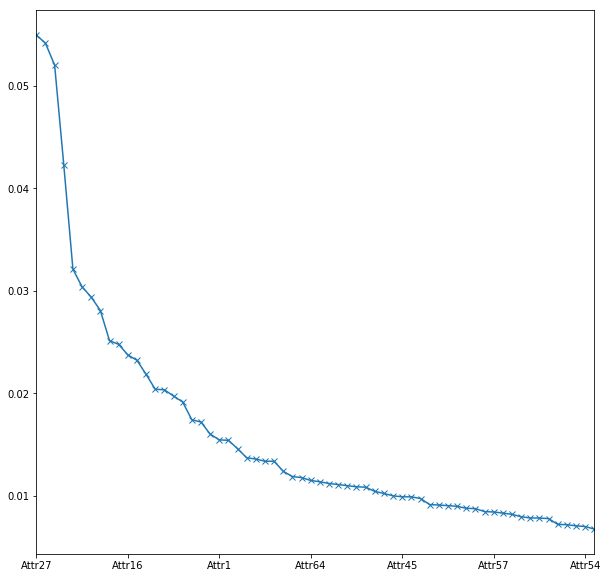

In [21]:
plt.figure(figsize=(10,10))
sorted_features.plot(marker='x')
# plt.xticks(features_imp.index)

In [22]:
len(sorted_features.index)

62

In [23]:
# significance covered by sorted features
sorted_features[sorted_features > 0.01].sum()

0.8066053856593541

In [24]:
selected_features = sorted_features[sorted_features > 0.01]

In [25]:
selected_features.shape

(39,)

In [26]:
X_smote2 = pd.DataFrame(data=X_smote, columns=X_train3.columns)[selected_features.index].copy()
X_test4 = X_test3[selected_features.index].copy()


In [27]:
# train = X_smote2.copy()
# train['y'] = y_smote
# test = X_test4.copy()
# test['y'] = y_test3
# train.to_csv('train.csv')
# test.to_csv('test.csv')

Accuracy: 94.99%
f1_score 0.499424626007
precision_score 0.507009345794
recall_score 0.492063492063
roc_auc_score 0.73323145484
cm matrix [[8031  211]
 [ 224  217]]


(441, 428)

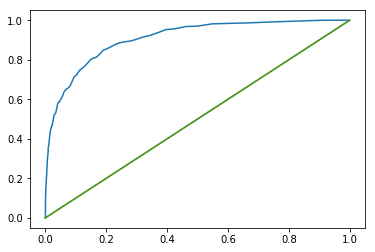

In [28]:
model = RandomForestClassifier(random_state=9, n_estimators=100, n_jobs=-1)
model.fit(X_smote2, y_smote)
y_pred = model.predict(X_test4)
print "Accuracy: %.2f%%" % (accuracy_score(y_test3, y_pred) * 100)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test4)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])

In [29]:
X_smote3 = X_smote2.copy()
for col in X_smote2.columns:
    X_smote3[col] = np.log(X_smote2[col] + 1 - min(X_smote2[col]))

In [30]:
X_test5 = X_test4.copy()
for col in X_test4.columns:
    X_test5[col] = np.log(X_test4[col] + 1 - min(X_test4[col]))

In [31]:
X_smote2.shape

(66143, 39)

Accuracy: 93.37%
f1_score 0.0204081632653
precision_score 0.0408163265306
recall_score 0.0136054421769
roc_auc_score 0.498248971998
cm matrix [[8101  141]
 [ 435    6]]


(441, 147)

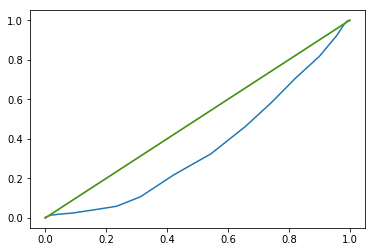

In [32]:
model = RandomForestClassifier(random_state=9, n_estimators=100,n_jobs=-1)
model.fit(X_smote3, y_smote)
y_pred = model.predict(X_test5)
print "Accuracy: %.2f%%" % (accuracy_score(y_test3, y_pred) * 100)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test5)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])